<a href="https://colab.research.google.com/github/Hemaaa006/Breast-cancer-detection/blob/main/Code_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir(r"/content/drive/MyDrive/Miniproject_pt4/Dataset_BUSI_with_GT")

['normal', 'malignant', 'benign']

In [ ]:
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

In [ ]:
bengin = import_images(r"/content/drive/MyDrive/Miniproject_pt4/Dataset_BUSI_with_GT/benign",0)
malignant = import_images(r"/content/drive/MyDrive/Miniproject_pt4/Dataset_BUSI_with_GT/malignant",1)
normal = import_images(r"/content/drive/MyDrive/Miniproject_pt4/Dataset_BUSI_with_GT/normal",2)

In [ ]:
bengin.extend(malignant)
bengin.extend(normal)

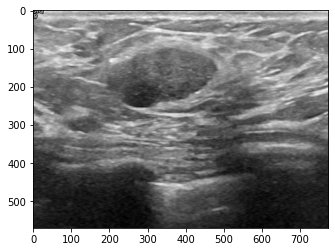

In [ ]:
plt.imshow(bengin[600][0],cmap='gray')

In [ ]:
full_data = bengin

feature_matrix = []
label = []
for x,y in full_data:
    feature_matrix.append(x)
    label.append(y)

In [ ]:
feature_matrix[0]

array([[48, 54, 56, ..., 85, 83, 81],
       [39, 46, 52, ..., 83, 83, 82],
       [28, 38, 47, ..., 80, 80, 80],
       ...,
       [12, 13, 14, ..., 14, 14, 14],
       [11, 13, 14, ..., 11, 11, 12],
       [13, 14, 16, ...,  9, 10, 11]], dtype=uint8)

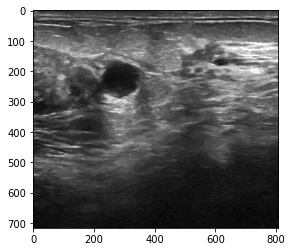

In [ ]:
plt.imshow(feature_matrix[0],cmap="gray")

In [ ]:
label[0]

0

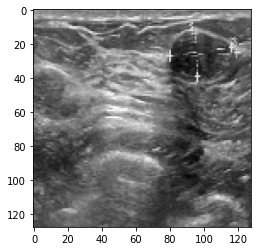

In [ ]:
## resized image
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)
    
    
plt.imshow(X[222],cmap="gray")

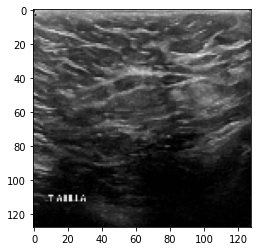

In [ ]:
X_corrected = []
for image in X:
    image = image/255
    X_corrected.append(image)
plt.imshow(X_corrected[213],cmap="gray")

In [ ]:
import numpy as np
np.array(X_corrected).shape #checking shape of the list

(1578, 128, 128)

In [ ]:
X_M = np.array(X_corrected) #converting the list to an array and again checking shape

X_M.shape[1]

128

In [ ]:
print(np.array(X_corrected).shape) #printing sizes of the 3D array
print(np.array(X_corrected).shape[0])
print(np.array(X_corrected).shape[1])
print(np.array(X_corrected).shape[2])

(1578, 128, 128)
1578
128
128


In [ ]:
X_M.shape

(1578, 128, 128)

In [ ]:
X_M_R =X_M.reshape(X_M.shape[0],X_M.shape[1],X_M.shape[2],1) #gray scale is 2D, for making it 3D we have to reshape it.

In [ ]:
X_M_R.shape

(1578, 128, 128, 1)

In [ ]:
from sklearn.model_selection import train_test_split #for importing a library to spilt data into training and testing.
X_train,X_test,y_train,y_test = train_test_split(X_M_R,label)

In [ ]:
print("X_train size: ",X_train.shape) #printing size of the split data
print("X_test Size: ",X_test.shape)

X_train size:  (1183, 128, 128, 1)
X_test Size:  (395, 128, 128, 1)


In [ ]:
import sys
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [ ]:
def define_model():
    model = Sequential() #for sequential data #for constructing the network
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128,1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) #loss function
    return model

In [ ]:
import numpy as np

In [ ]:
model =  define_model()
history = model.fit(np.array(X_train),np.array(y_train), epochs=20,validation_data=(X_test, np.array(y_test)))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
37/37 [==============================] - 17s 97ms/step - loss: 0.8897 - accuracy: 0.5883 - val_loss: 0.7983 - val_accuracy: 0.6405
Epoch 2/20
37/37 [==============================] - 2s 64ms/step - loss: 0.7675 - accuracy: 0.6839 - val_loss: 0.7202 - val_accuracy: 0.6481
Epoch 3/20
37/37 [==============================] - 2s 64ms/step - loss: 0.6808 - accuracy: 0.6898 - val_loss: 0.7244 - val_accuracy: 0.6430
Epoch 4/20
37/37 [==============================] - 2s 64ms/step - loss: 0.6128 - accuracy: 0.7050 - val_loss: 0.6550 - val_accuracy: 0.6658
Epoch 5/20
37/37 [==============================] - 2s 64ms/step - loss: 0.5710 - accuracy: 0.7227 - val_loss: 0.6930 - val_accuracy: 0.7316
Epoch 6/20
37/37 [==============================] - 2s 64ms/step - loss: 0.5112 - accuracy: 0.7811 - val_loss: 0.5906 - val_accuracy: 0.7342
Epoch 7/20
37/37 [==============================] - 2s 64ms/step - loss: 0.4298 - accuracy: 0.8022 - val_loss: 0.8175 - val_accuracy: 0.7316
Epoch 8/20
3

In [ ]:
model.save('caner.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


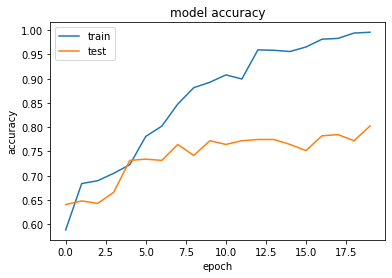

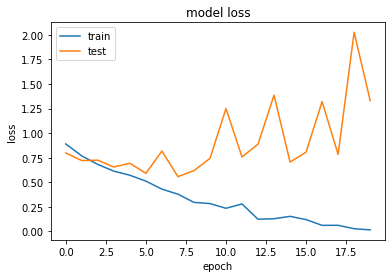

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy']) #history is a variable which stores data of model.save
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.evaluate(np.array(X_test),np.array(y_test))

13/13 [==============================] - 0s 26ms/step - loss: 1.3317 - accuracy: 0.8025


[1.331701397895813, 0.8025316596031189]

In [ ]:
predicted = []
for item in model.predict(X_test):
    predicted.append(np.argmax(item))
    
print(X_test.shape)

(395, 128, 128, 1)


In [ ]:
#### label of the X_test prediction
for item in predicted:
    print(item,) #printing the output cases of benign,malignant and normal for test set

0
1
0
2
0
1
0
1
0
0
0
1
0
1
1
0
1
0
1
0
1
2
0
0
0
2
0
0
1
1
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
2
1
0
0
1
0
0
1
1
2
1
1
0
1
0
0
0
1
0
0
0
1
0
1
0
2
2
0
1
1
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
1
0
0
1
1
1
1
0
0
0
1
0
1
0
1
1
0
0
1
2
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
2
0
0
1
0
2
0
0
0
0
0
0
1
0
2
2
0
1
0
1
0
0
1
0
0
0
2
0
0
0
2
0
2
0
1
1
0
1
2
0
2
0
0
0
0
1
0
0
2
2
0
0
1
2
2
2
0
1
0
1
0
0
2
1
2
1
0
2
0
0
2
1
0
0
1
1
0
1
2
0
1
1
1
0
0
1
0
0
2
2
2
1
0
0
1
0
1
1
2
0
1
0
0
1
0
0
0
2
0
2
0
1
1
0
0
2
0
0
0
1
2
1
0
0
0
0
0
0
2
0
0
1
0
0
1
0
1
0
0
2
0
0
0
0
2
1
0
1
0
0
1
2
0
0
1
0
0
0
1
0
0
2
0
0
0
0
1
0
0
0
2
0
0
0
0
0
0
1
1
0
0
1
1
1
1
0
0
1
0
1
0
2
0
0
0
0
1
0
0
2
1
1
0
0
0
0
0
1
2
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
1
0
2
0
0
0
0
2
1
1
0
0
0
0
0
1
1
0
0
0
0
0
2
1
1
0
0
1
1
0
0
0
0
1
0
0
0


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test,predicted)
conf

array([[195,  21,   1],
       [ 33,  77,   3],
       [ 11,   9,  45]])

Text(0.5, 117.59999999999997, 'Predicted')

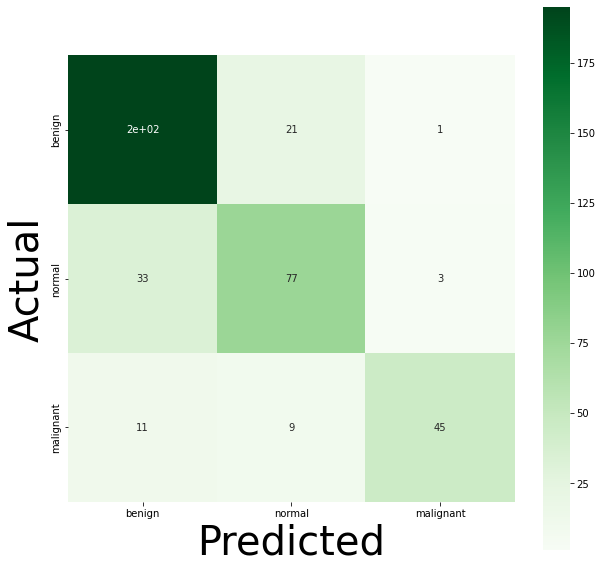

In [ ]:
info = [
    'benign'   ,  # 0
    'normal'   ,  # 1
    'malignant',  # 2
]
plt.figure(figsize = (10,10))
ax = sns.heatmap(conf, cmap=plt.cm.Greens, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

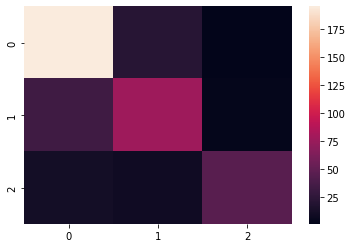

In [ ]:
import seaborn as sns
sns.heatmap(conf)

In [ ]:
X_test.shape

(395, 128, 128, 1)

In [ ]:
img = X_test[222]

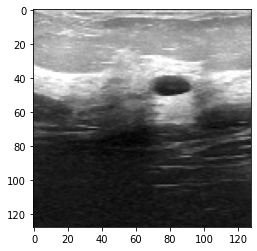

In [ ]:
plt.imshow(img.reshape((128,128)),cmap="gray")

In [ ]:
img1=img.reshape(1,X_M.shape[1],X_M.shape[2],1)

In [ ]:
img1.shape

(1, 128, 128, 1)

In [ ]:
np.argmax(model.predict(img1))

0

In [ ]:
def image_prediction(img):
#     plt.imshow(img)
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        return "Benign, the cells are not yet cancerous, but they have the potential to become malignant. Consult the doctor","Benign"
    elif predict==1:
        return "Malignant, tumors are cancerous. The cells can grow and spread to other parts of the body. Visit to the doctor as soon as possible","Malignant"
    else:

        return "YOU are in Normal condition. No need to worry","Normal"

In [ ]:
result_m=image_prediction(X_test[7])

Malignant, tumors are cancerous. The cells can grow and spread to other parts of the body. Visit to the doctor as soon as possible


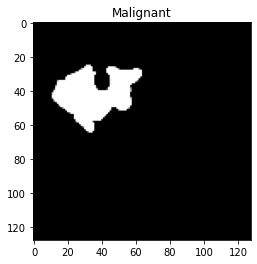

In [ ]:
print(result_m[0])
plt.title(result_m[1])
plt.imshow(X_test[7].reshape((128,128)),cmap="gray")
plt.show()

In [ ]:
result_n=image_prediction(X_test[6])

Benign, the cells are not yet cancerous, but they have the potential to become malignant. Consult the doctor


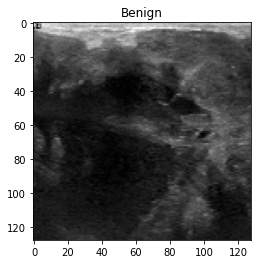

In [ ]:
print(result_n[0])
plt.title(result_n[1])
plt.imshow(X_test[6].reshape((128,128)),cmap="gray")
plt.show()

In [ ]:
result=image_prediction(X_test[4])

Benign, the cells are not yet cancerous, but they have the potential to become malignant. Consult the doctor


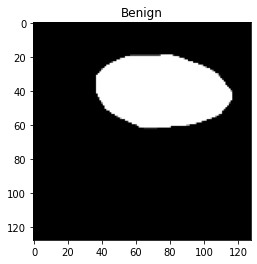

In [ ]:
print(result[0])
plt.title(result[1])
plt.imshow(X_test[4].reshape((128,128)),cmap="gray")
plt.show()

In [ ]:
result=image_prediction(X_test[256])

Benign, the cells are not yet cancerous, but they have the potential to become malignant. Consult the doctor


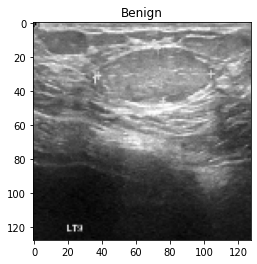

In [ ]:
print(result[0])
plt.title(result[1])
plt.imshow(X_test[256].reshape((128,128)),cmap="gray")
plt.show()

In [ ]:
def new_prediction(img):
    
    IMG_SIZE = 128
    img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
model.save_weights('model.h5')
model.save('Cancer_CNN.model')

INFO:tensorflow:Assets written to: Cancer_CNN.model/assets


In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ["Normal", "Benign", "Malignant"]
# def prepare(filepath):
#     IMG_SIZE = 128  # 50 in txt-based
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#     return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("Cancer_CNN.model")
#model1 = model.load_weights("./model.h5")
prediction = model.predict([new_prediction(r'/content/drive/MyDrive/Miniproject_pt4/Dataset_BUSI_with_GT/malignant/malignant (10).png')])
   
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])


[[0. 1. 0.]]
Normal


In [ ]:
predict = np.argmax(prediction)

if predict==0:
    print("YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT")
    
elif predict==1:
    print("Benign the cells are not yet cancerous, but they have the potential to become malignant consult the doctor")
else:
    print("Malignant the tumors are cancerous. The cells can grow and spread to other parts of the body.")

Benign the cells are not yet cancerous, but they have the potential to become malignant consult the doctor
